# Import Libraries and Load the Data

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [70]:
import nltk
from nltk.translate.bleu_score import sentence_bleu
from rouge import Rouge
import nltk
nltk.download('wordnet')
from nltk.translate.meteor_score import meteor_score

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\10788\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [71]:
data = pd.read_csv('answer_list.csv')

In [72]:
data

,Question,Ground Truth,PE_Chain of thoughts,PE_Example,PE_Priming,PE_Task instruction,PE_Tree of thoughts,Fine tuned
0,What are the essential hardware advancements n...,"First, It includes using Machine learning mode...",What are the essential hardware advancements n...,In light of concerns over AI's societal impact...,Addressing the ethical quandaries posed by art...,Addressing the ethical quandaries posed by art...,What technological advancements are necessary ...,What are the essential hardware advancements n...
1,What goals are pursued by the OECD AI Principl...,"Adopted in 2019 and endorsed by 42 countries, ...",What goals are pursued by the OECD AI Principl...,Given the global debate on AI's role in societ...,In the context of international cooperation fo...,In the context of international cooperation fo...,What objectives do the OECD AI Principles targ...,What goals are pursued by the OECD AI Principl...
2,What essential elements must be included in an...,The appeal must contain the following: 1. The ...,What essential elements must be included in an...,In the context of leveraging AI across sectors...,In the context of fostering global advancement...,In the context of fostering global advancement...,What essential elements must be included in an...,What essential elements must be included in an...


# Creat a Automatic Score Generation Function

In [73]:
def Score_generator(a, b):
    score_bleu = sentence_bleu([a.split()], b.split())
    scores_rouge = rouge.get_scores(a, b)[0]
    score_meteor = meteor_score([a.split()], b.split())
    return pd.Series({
        'BLEU': score_bleu,
        'ROUGE-1 F': scores_rouge['rouge-1']['f'],
        'ROUGE-2 F': scores_rouge['rouge-2']['f'],
        'ROUGE-L F': scores_rouge['rouge-l']['f'],
        'METEOR': score_meteor
    })

# Generate Automatic Score for Each Comparison and Visualize 

## PE_Chain of thoughts VS. Ground Truth

In [74]:
# Initialize an empty list to store the scores
scores_list = []
rouge = Rouge()
# Loop through each row in the original DataFrame
for index, row in data.iterrows():
    # Apply the Score_generator function to each row
    score_row = Score_generator(row['PE_Chain of thoughts'], row['Ground Truth'])
    # Append the result to the list
    scores_list.append(score_row)

# Concatenate all the score Series into a single DataFrame
df_results = pd.DataFrame(scores_list)

# Now df_results contains all the scores for each row in the original DataFrame
print(df_results)

            BLEU  ROUGE-1 F  ROUGE-2 F  ROUGE-L F    METEOR
0  1.808657e-155   0.133333   0.010204   0.106667  0.095198
1   3.966982e-02   0.312057   0.108108   0.269504  0.171670
2  3.977361e-156   0.239316   0.055556   0.222222  0.092939


C:\Users\10788\AppData\Local\Programs\Python\Python311\Lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
C:\Users\10788\AppData\Local\Programs\Python\Python311\Lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


In [75]:
PE_Chain_of_thoughts_score = df_results.mean()

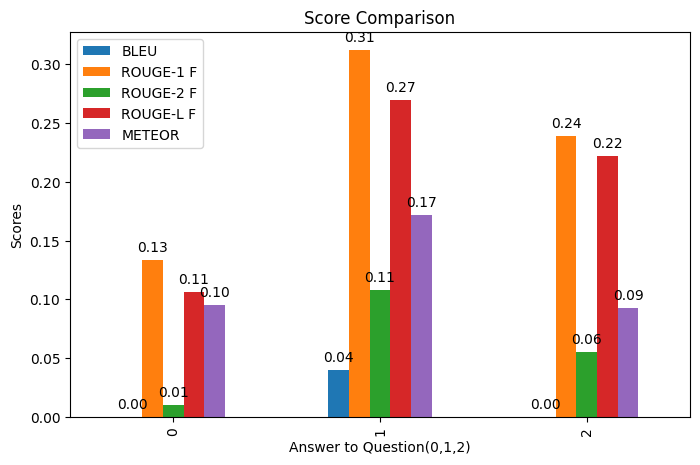

In [76]:
ax = df_results.plot(kind='bar', figsize=(8, 5))

# set title and labels
plt.title('Score Comparison')
plt.xlabel('Answer to Question(0,1,2)')
plt.ylabel('Scores')

# show legend
plt.legend()

# loop to show the value of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

# show the plot
plt.show()

## PE_Example VS. Ground Truth

In [77]:
# Initialize an empty list to store the scores
scores_list = []

# Loop through each row in the original DataFrame
for index, row in data.iterrows():
    # Apply the Score_generator function to each row
    score_row = Score_generator(row['PE_Example'], row['Ground Truth'])
    # Append the result to the list
    scores_list.append(score_row)

# Concatenate all the score Series into a single DataFrame
df_results = pd.DataFrame(scores_list)

# Now df_results contains all the scores for each row in the original DataFrame
print(df_results)

            BLEU  ROUGE-1 F  ROUGE-2 F  ROUGE-L F    METEOR
0  6.958245e-232   0.124224   0.000000   0.111801  0.101642
1   4.915346e-02   0.294118   0.102857   0.264706  0.167203
2  4.422551e-156   0.112903   0.035928   0.112903  0.061063


C:\Users\10788\AppData\Local\Programs\Python\Python311\Lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
C:\Users\10788\AppData\Local\Programs\Python\Python311\Lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
C:\Users\10788\AppData\Local\Programs\Python\Python311\Lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lowe

In [78]:
PE_example_score = df_results.mean()

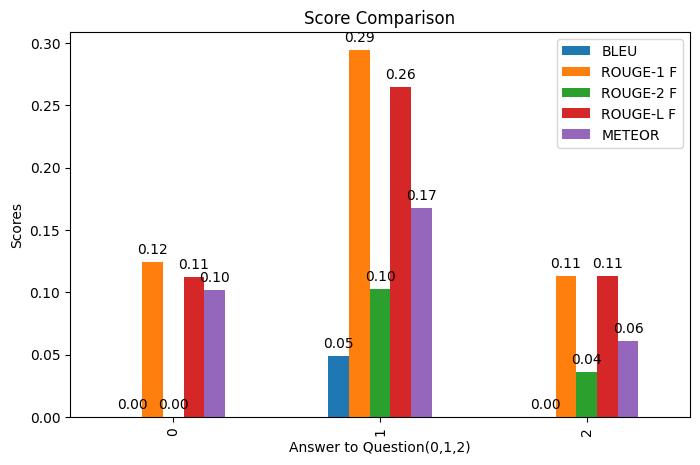

In [79]:
ax = df_results.plot(kind='bar', figsize=(8, 5))

# set title and labels
plt.title('Score Comparison')
plt.xlabel('Answer to Question(0,1,2)')
plt.ylabel('Scores')

# show legend
plt.legend()

# loop to show the value of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

# show the plot
plt.show()

## PE_Priming VS. Ground Truth

In [80]:
# Initialize an empty list to store the scores
scores_list = []

# Loop through each row in the original DataFrame
for index, row in data.iterrows():
    # Apply the Score_generator function to each row
    score_row = Score_generator(row['PE_Priming'], row['Ground Truth'])
    # Append the result to the list
    scores_list.append(score_row)

# Concatenate all the score Series into a single DataFrame
df_results = pd.DataFrame(scores_list)

# Now df_results contains all the scores for each row in the original DataFrame
print(df_results)

            BLEU  ROUGE-1 F  ROUGE-2 F  ROUGE-L F    METEOR
0  7.395713e-232   0.119205   0.000000   0.119205  0.109701
1   9.392058e-79   0.376068   0.103896   0.239316  0.136673
2  1.520093e-232   0.162602   0.000000   0.130081  0.060096


C:\Users\10788\AppData\Local\Programs\Python\Python311\Lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
C:\Users\10788\AppData\Local\Programs\Python\Python311\Lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
C:\Users\10788\AppData\Local\Programs\Python\Python311\Lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lowe

In [81]:
PE_Priming_score = df_results.mean()

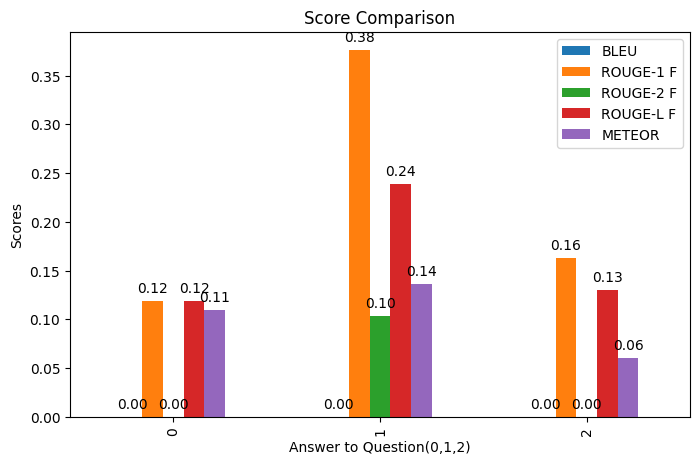

In [82]:
ax = df_results.plot(kind='bar', figsize=(8, 5))

# set title and labels
plt.title('Score Comparison')
plt.xlabel('Answer to Question(0,1,2)')
plt.ylabel('Scores')

# show legend
plt.legend()

# loop to show the value of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

# show the plot
plt.show()

## PE_Task instruction VS. Ground Truth

In [83]:
# Initialize an empty list to store the scores
scores_list = []

# Loop through each row in the original DataFrame
for index, row in data.iterrows():
    # Apply the Score_generator function to each row
    score_row = Score_generator(row['PE_Task instruction'], row['Ground Truth'])
    # Append the result to the list
    scores_list.append(score_row)

# Concatenate all the score Series into a single DataFrame
df_results = pd.DataFrame(scores_list)

# Now df_results contains all the scores for each row in the original DataFrame
print(df_results)

            BLEU  ROUGE-1 F  ROUGE-2 F  ROUGE-L F    METEOR
0  7.395713e-232   0.119205   0.000000   0.119205  0.109701
1   9.392058e-79   0.376068   0.103896   0.239316  0.136673
2  1.520093e-232   0.162602   0.000000   0.130081  0.060096


C:\Users\10788\AppData\Local\Programs\Python\Python311\Lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
C:\Users\10788\AppData\Local\Programs\Python\Python311\Lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
C:\Users\10788\AppData\Local\Programs\Python\Python311\Lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lowe

In [84]:
PE_Task_instruction_score = df_results.mean()

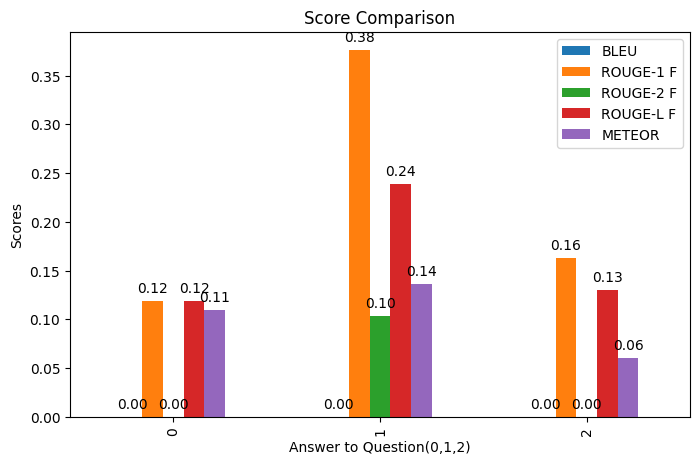

In [85]:
ax = df_results.plot(kind='bar', figsize=(8, 5))

# set title and labels
plt.title('Score Comparison')
plt.xlabel('Answer to Question(0,1,2)')
plt.ylabel('Scores')

# show legend
plt.legend()

# loop to show the value of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

# show the plot
plt.show()

## PE_Tree of thoughts VS. Ground Truth

In [86]:
# Initialize an empty list to store the scores
scores_list = []

# Loop through each row in the original DataFrame
for index, row in data.iterrows():
    # Apply the Score_generator function to each row
    score_row = Score_generator(row['PE_Tree of thoughts'], row['Ground Truth'])
    # Append the result to the list
    scores_list.append(score_row)

# Concatenate all the score Series into a single DataFrame
df_results = pd.DataFrame(scores_list)

# Now df_results contains all the scores for each row in the original DataFrame
print(df_results)

            BLEU  ROUGE-1 F  ROUGE-2 F  ROUGE-L F    METEOR
0  6.779408e-232   0.162162   0.010204   0.148649  0.098859
1   3.146298e-02   0.279720   0.088398   0.223776  0.149875
2  3.977361e-156   0.239316   0.055556   0.222222  0.092939


C:\Users\10788\AppData\Local\Programs\Python\Python311\Lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
C:\Users\10788\AppData\Local\Programs\Python\Python311\Lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
C:\Users\10788\AppData\Local\Programs\Python\Python311\Lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lowe

In [87]:
PE_tree_of_thoughts_score = df_results.mean()

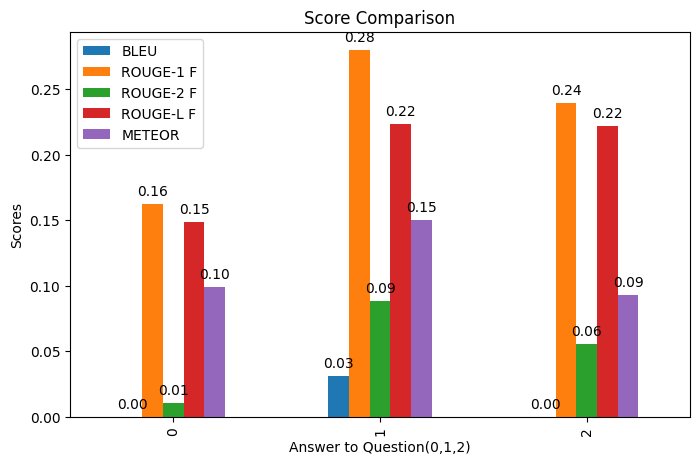

In [88]:
ax = df_results.plot(kind='bar', figsize=(8, 5))

# set title and labels
plt.title('Score Comparison')
plt.xlabel('Answer to Question(0,1,2)')
plt.ylabel('Scores')

# show legend
plt.legend()

# loop to show the value of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

# show the plot
plt.show()

## Fine tuned VS. Ground Truth

In [89]:
# Initialize an empty list to store the scores
scores_list = []

# Loop through each row in the original DataFrame
for index, row in data.iterrows():
    # Apply the Score_generator function to each row
    score_row = Score_generator(row['Fine tuned'], row['Ground Truth'])
    # Append the result to the list
    scores_list.append(score_row)

# Concatenate all the score Series into a single DataFrame
df_results = pd.DataFrame(scores_list)

# Now df_results contains all the scores for each row in the original DataFrame
print(df_results)

            BLEU  ROUGE-1 F  ROUGE-2 F  ROUGE-L F    METEOR
0  6.546638e-232   0.166667   0.000000   0.121212  0.083082
1   3.349849e-02   0.406780   0.115385   0.322034  0.203512
2   2.990709e-79   0.313043   0.096386   0.295652  0.125894


C:\Users\10788\AppData\Local\Programs\Python\Python311\Lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
C:\Users\10788\AppData\Local\Programs\Python\Python311\Lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
C:\Users\10788\AppData\Local\Programs\Python\Python311\Lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lowe

In [90]:
fine_tuned_score = df_results.mean()

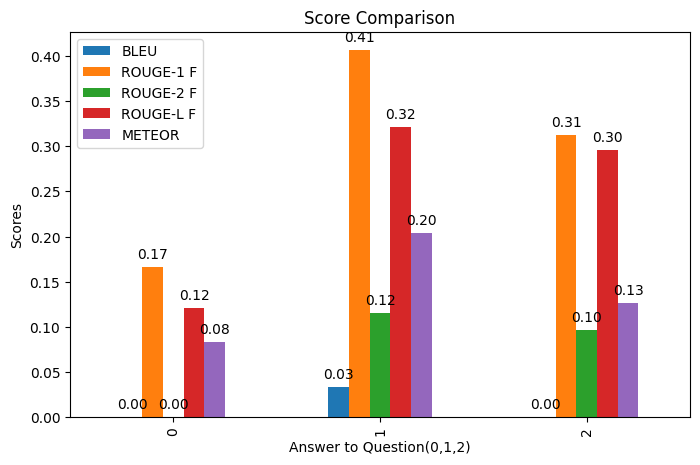

In [91]:
ax = df_results.plot(kind='bar', figsize=(8, 5))

# set title and labels
plt.title('Score Comparison')
plt.xlabel('Answer to Question(0,1,2)')
plt.ylabel('Scores')

# show legend
plt.legend()

# loop to show the value of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

# show the plot
plt.show()

# Compare Overall Score for Each Model

In [92]:
PE_Chain_of_thoughts_score

BLEU         0.013223
ROUGE-1 F    0.228235
ROUGE-2 F    0.057956
ROUGE-L F    0.199464
METEOR       0.119936
dtype: float64

In [93]:
score = pd.DataFrame(PE_Chain_of_thoughts_score, columns=['PE_Chain_of_thoughts_score'])

In [94]:
score['PE_example_score']=PE_example_score

In [95]:
score['PE_Priming_score']=PE_Priming_score

In [96]:
score['PE_Task_instruction_score']=PE_Task_instruction_score

In [97]:
score['PE_tree_of_thoughts_score']=PE_tree_of_thoughts_score

In [98]:
score['fine_tuned_score']=fine_tuned_score

In [99]:
score

,PE_Chain_of_thoughts_score,PE_example_score,PE_Priming_score,PE_Task_instruction_score,PE_tree_of_thoughts_score,fine_tuned_score
BLEU,0.013223,0.016384,3.130686e-79,3.130686e-79,0.010488,0.011166
ROUGE-1 F,0.228235,0.177081,2.192918e-01,2.192918e-01,0.227066,0.295497
ROUGE-2 F,0.057956,0.046262,3.463203e-02,3.463203e-02,0.051386,0.070590
ROUGE-L F,0.199464,0.163137,1.628676e-01,1.628676e-01,0.198216,0.246299
METEOR,0.119936,0.109969,1.021568e-01,1.021568e-01,0.113891,0.137496


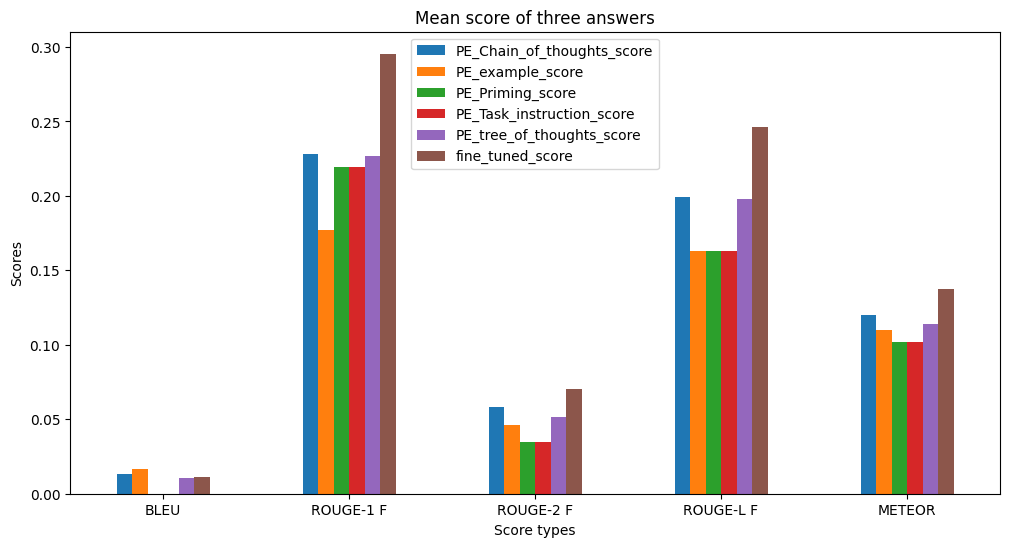

In [100]:
# Set ax, type and size
ax = score.plot(kind='bar', figsize=(12,6))

# set title and labels
plt.title('Mean score of three answers')
plt.xlabel('Score types')
plt.ylabel('Scores')
plt.xticks(rotation=0)
# show legend
plt.legend()

# show the plot
plt.show()

# Human Evaluation score comparision

In [101]:
humanscore = pd.read_csv('Human Evaluation Score.csv')

In [102]:
humanscore

,Question,type,relevance,correctness,informativeness
0,1,PE_COT,4,1,6
1,2,PE_COT,7,5,4
2,3,PE_COT,7,6,8
3,1,PE_Example,7,6,6
4,2,PE_Example,4,5,4
5,3,PE_Example,8,4,5
6,1,PE_Priming,4,7,8
7,2,PE_Priming,5,4,3
8,3,PE_Priming,6,5,5
9,1,PE_Task_instruction,5,8,4


In [103]:
human_score = humanscore.groupby('type').mean()

In [104]:
human_score=round(human_score,2)

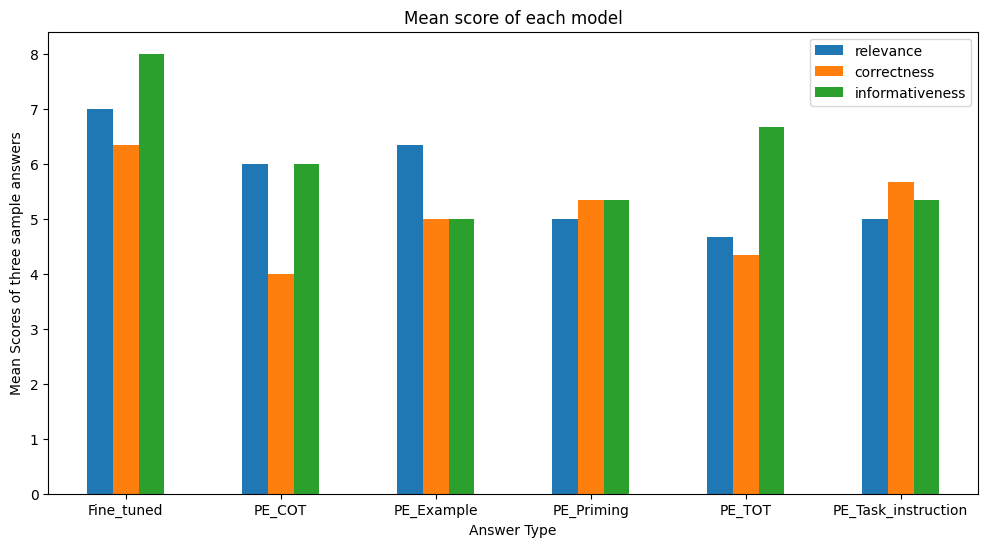

In [105]:
# Set ax, type and size
ax = human_score[['relevance','correctness','informativeness']].plot(kind='bar', figsize=(12,6))

# set title and labels
plt.title('Mean score of each model')
plt.xlabel('Answer Type')
plt.ylabel('Mean Scores of three sample answers')
plt.xticks(rotation=0)
# show legend
plt.legend()

# show the plot
plt.show()